In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(diabetes.DESCR)
df

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(diabetes.data)

df_std = pd.DataFrame(X_std, columns=diabetes.feature_names)

df_std.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00


In [5]:
pca = PCA()
pca.fit(X_std)

explained = pca.explained_variance_ratio_
cum_explained = explained.cumsum()

pca_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained))],
    "Explained Variance": explained,
    "Cumulative Variance": cum_explained
})

pca_df

,PC,Explained Variance,Cumulative Variance
0,PC1,0.402421,0.402421
1,PC2,0.149232,0.551653
2,PC3,0.120597,0.672250
3,PC4,0.095548,0.767797
4,PC5,0.066218,0.834015
5,PC6,0.060272,0.894287
6,PC7,0.053657,0.947944
7,PC8,0.043368,0.991312
8,PC9,0.007832,0.999144
9,PC10,0.000856,1.000000


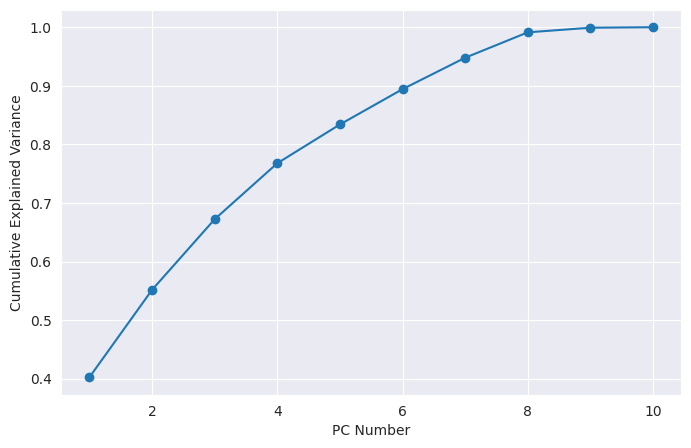

In [6]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), cum_explained, marker="o")
plt.xlabel("PC Number")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [7]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained))],
    index=diabetes.feature_names
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,0.216431,0.044367,0.494668,0.414012,0.686876,-0.225815,-0.109530,-0.014937,0.008100,0.003263
sex,0.186967,-0.386547,-0.106864,0.679860,-0.373464,0.041705,-0.067622,-0.442933,-0.002106,0.003660
bmi,0.303162,-0.156281,0.167527,-0.499825,-0.129333,-0.403151,-0.519874,-0.392922,0.042377,0.008247
bp,0.271738,-0.138266,0.513571,0.019662,-0.486874,-0.272783,0.320655,0.477360,0.027194,-0.003222
s1,0.343255,0.573027,-0.068579,0.068396,-0.129180,0.005398,0.073644,-0.129411,-0.042038,0.709775
s2,0.351861,0.455942,-0.269689,0.167774,-0.116722,-0.133262,-0.230535,0.191325,-0.359316,-0.563195
s3,-0.282437,0.506239,0.386032,0.076020,-0.245001,0.106354,-0.007548,-0.324635,0.481247,-0.317445
s4,0.428834,-0.068181,-0.380680,-0.007921,0.143646,-0.033936,0.071244,0.180587,0.773817,-0.090596
s5,0.378618,-0.026187,0.063630,-0.264427,0.151639,0.178731,0.647302,-0.449684,-0.189460,-0.264466
s6,0.322183,-0.084949,0.276842,-0.087085,-0.031423,0.805066,-0.357267,0.166608,-0.015274,0.002611


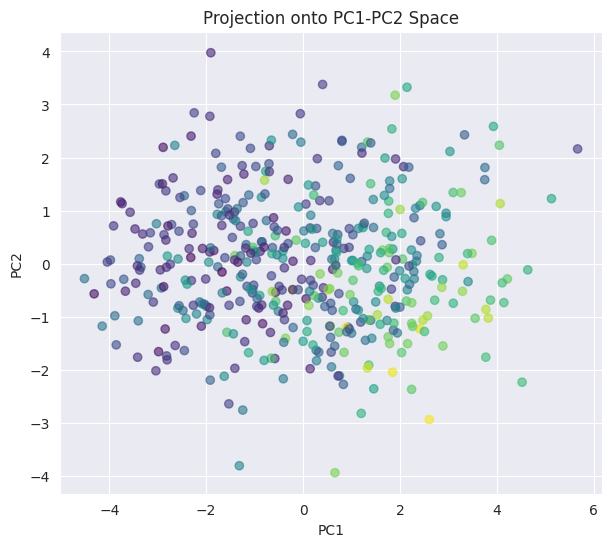

In [9]:
X_pca = pca.transform(X_std)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c=diabetes.target, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection onto PC1-PC2 Space")
plt.grid(True)
plt.show()